In [210]:
# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv('AE1_vishing_data_zipped.csv', engine='python')

In [211]:
# Filter for only English tweets 
df = df[df["lang"] == "en"]

In [212]:
# Drop irrelevant columns
df = df.drop(columns=["id", "source"])

In [213]:
df

,created_at,author_id,lang,text
0,2019-04-01T10:12:52.000Z,PnsVIF3t,en,Is there any scam calls going round now where ...
3,2019-04-01T10:07:01.000Z,ueO4OFLj,en,Yet another scam call allegedly from @bt_uk ab...
5,2019-04-01T10:03:31.000Z,8VnQJODk,en,Scam alert: Beware of scammers impersonating P...
6,2019-04-01T10:03:04.000Z,oXd49QtC,en,"Do you know the difference between #Phishing, ..."
8,2019-04-01T09:56:57.000Z,WhCjY3aI,en,@frontpoint can you guys explain how it is tha...
...,...,...,...,...
1483726,2019-09-28T16:58:57.000Z,OiDq98Y7,en,RT @SnoCoSheriff: SCAM: There are scammers cal...
1483727,2019-09-28T16:54:30.000Z,fMku3HC8,en,.@SCENECard why can't I get ahold of anyone on...
1483728,2019-09-28T16:54:04.000Z,XQQKecFO,en,"RT @MyFashi67176461: Last year, the Federal Tr..."
1483729,2019-09-28T16:53:44.000Z,i0DC2fbM,en,"Call 911, Chelsea Clinton Just Burned Donald T..."


In [214]:
# Convert text to lowercase
df["text"] = df["text"].astype(str).apply(lambda x: x.lower())

In [215]:
df

,created_at,author_id,lang,text
0,2019-04-01T10:12:52.000Z,PnsVIF3t,en,is there any scam calls going round now where ...
3,2019-04-01T10:07:01.000Z,ueO4OFLj,en,yet another scam call allegedly from @bt_uk ab...
5,2019-04-01T10:03:31.000Z,8VnQJODk,en,scam alert: beware of scammers impersonating p...
6,2019-04-01T10:03:04.000Z,oXd49QtC,en,"do you know the difference between #phishing, ..."
8,2019-04-01T09:56:57.000Z,WhCjY3aI,en,@frontpoint can you guys explain how it is tha...
...,...,...,...,...
1483726,2019-09-28T16:58:57.000Z,OiDq98Y7,en,rt @snocosheriff: scam: there are scammers cal...
1483727,2019-09-28T16:54:30.000Z,fMku3HC8,en,.@scenecard why can't i get ahold of anyone on...
1483728,2019-09-28T16:54:04.000Z,XQQKecFO,en,"rt @myfashi67176461: last year, the federal tr..."
1483729,2019-09-28T16:53:44.000Z,i0DC2fbM,en,"call 911, chelsea clinton just burned donald t..."


In [216]:
# Remove special characters
df["text"] = df["text"].astype(str).apply(lambda x: re.sub(r"[^\w\s]", "", x))
# Remove digits
df["text"] = df["text"].apply(lambda x: re.sub(r"\d+", "", x))
# Remove redundant whitespaces
df["text"] = df["text"].apply(lambda x: re.sub(r"\s+", " ", x).strip())

In [217]:
df

,created_at,author_id,lang,text
0,2019-04-01T10:12:52.000Z,PnsVIF3t,en,is there any scam calls going round now where ...
3,2019-04-01T10:07:01.000Z,ueO4OFLj,en,yet another scam call allegedly from bt_uk abo...
5,2019-04-01T10:03:31.000Z,8VnQJODk,en,scam alert beware of scammers impersonating po...
6,2019-04-01T10:03:04.000Z,oXd49QtC,en,do you know the difference between phishing vi...
8,2019-04-01T09:56:57.000Z,WhCjY3aI,en,frontpoint can you guys explain how it is that...
...,...,...,...,...
1483726,2019-09-28T16:58:57.000Z,OiDq98Y7,en,rt snocosheriff scam there are scammers callin...
1483727,2019-09-28T16:54:30.000Z,fMku3HC8,en,scenecard why cant i get ahold of anyone on th...
1483728,2019-09-28T16:54:04.000Z,XQQKecFO,en,rt myfashi last year the federal trade commiss...
1483729,2019-09-28T16:53:44.000Z,i0DC2fbM,en,call chelsea clinton just burned donald trump ...


In [218]:
# Convert text into a list of words
df["word_list"] = df["text"].apply(lambda x: x.split())

In [219]:
df

,created_at,author_id,lang,text,word_list
0,2019-04-01T10:12:52.000Z,PnsVIF3t,en,is there any scam calls going round now where ...,"[is, there, any, scam, calls, going, round, no..."
3,2019-04-01T10:07:01.000Z,ueO4OFLj,en,yet another scam call allegedly from bt_uk abo...,"[yet, another, scam, call, allegedly, from, bt..."
5,2019-04-01T10:03:31.000Z,8VnQJODk,en,scam alert beware of scammers impersonating po...,"[scam, alert, beware, of, scammers, impersonat..."
6,2019-04-01T10:03:04.000Z,oXd49QtC,en,do you know the difference between phishing vi...,"[do, you, know, the, difference, between, phis..."
8,2019-04-01T09:56:57.000Z,WhCjY3aI,en,frontpoint can you guys explain how it is that...,"[frontpoint, can, you, guys, explain, how, it,..."
...,...,...,...,...,...
1483726,2019-09-28T16:58:57.000Z,OiDq98Y7,en,rt snocosheriff scam there are scammers callin...,"[rt, snocosheriff, scam, there, are, scammers,..."
1483727,2019-09-28T16:54:30.000Z,fMku3HC8,en,scenecard why cant i get ahold of anyone on th...,"[scenecard, why, cant, i, get, ahold, of, anyo..."
1483728,2019-09-28T16:54:04.000Z,XQQKecFO,en,rt myfashi last year the federal trade commiss...,"[rt, myfashi, last, year, the, federal, trade,..."
1483729,2019-09-28T16:53:44.000Z,i0DC2fbM,en,call chelsea clinton just burned donald trump ...,"[call, chelsea, clinton, just, burned, donald,..."


In [220]:
# Remove meaningless words from word list
STOPWORDS = ["i", "a", "an", "and", "the", "on", "of", "in", "with", "you", "me", "to", "at", "for",
             "is", "it", "he", "she", "we", "they", "us", "them", "his", "her", "my", "your", "our", 
             "this", "that", "those", "these", "from", "by", "so", "but", "or", "as", "be", "was", 
             "were", "has", "have", "had", "do", "does", "did", "am", "are", "not", "rt", "via", "u", 
             "ur", "im", "w", "thats", "its", "ill", "youre", "yall", "id", "ive", "dont", "didnt", 
             "doesnt", "cant", "couldnt", "wouldnt", "shouldnt", "one", "two", "three", "first", 
             "second", "third", "new", "old", "many", "more", "most", "other", "some", "such", "only", 
             "same", "any", "there", "can", "weve", "how"]

df["word_list"] = df["word_list"].apply(lambda words: [word for word in words if word not in STOPWORDS])

In [221]:
df

,created_at,author_id,lang,text,word_list
0,2019-04-01T10:12:52.000Z,PnsVIF3t,en,is there any scam calls going round now where ...,"[scam, calls, going, round, now, where, call, ..."
3,2019-04-01T10:07:01.000Z,ueO4OFLj,en,yet another scam call allegedly from bt_uk abo...,"[yet, another, scam, call, allegedly, bt_uk, a..."
5,2019-04-01T10:03:31.000Z,8VnQJODk,en,scam alert beware of scammers impersonating po...,"[scam, alert, beware, scammers, impersonating,..."
6,2019-04-01T10:03:04.000Z,oXd49QtC,en,do you know the difference between phishing vi...,"[know, difference, between, phishing, vishing,..."
8,2019-04-01T09:56:57.000Z,WhCjY3aI,en,frontpoint can you guys explain how it is that...,"[frontpoint, guys, explain, cancelled, service..."
...,...,...,...,...,...
1483726,2019-09-28T16:58:57.000Z,OiDq98Y7,en,rt snocosheriff scam there are scammers callin...,"[snocosheriff, scam, scammers, calling, claimi..."
1483727,2019-09-28T16:54:30.000Z,fMku3HC8,en,scenecard why cant i get ahold of anyone on th...,"[scenecard, why, get, ahold, anyone, customer,..."
1483728,2019-09-28T16:54:04.000Z,XQQKecFO,en,rt myfashi last year the federal trade commiss...,"[myfashi, last, year, federal, trade, commissi..."
1483729,2019-09-28T16:53:44.000Z,i0DC2fbM,en,call chelsea clinton just burned donald trump ...,"[call, chelsea, clinton, just, burned, donald,..."


In [222]:
# Get the top ten most frequent users by how many tweets
top_users = df["author_id"].value_counts().head(10)
top_users

author_id
Js52nhWF    2532
8vALwyFC    2294
lBB5fznp    1985
ibxoF7ek    1721
2XsS0PvX    1327
ew1xCVya    1010
AVqtlsOh     965
3inC0kom     955
AIrDCdLj     917
u4iShEo6     727
Name: count, dtype: int64

In [223]:
top_user_ids = top_users.index.tolist()
top_user_ids

['Js52nhWF',
 '8vALwyFC',
 'lBB5fznp',
 'ibxoF7ek',
 '2XsS0PvX',
 'ew1xCVya',
 'AVqtlsOh',
 '3inC0kom',
 'AIrDCdLj',
 'u4iShEo6']

In [224]:
# Filter dataframe to only contain tweets from the top ten most frequent users
df_top = df[df["author_id"].isin(top_user_ids)]

In [225]:
df_top

,created_at,author_id,lang,text,word_list
12,2019-04-01T09:40:03.000Z,Js52nhWF,en,scam calls he bought your info he needs a few ...,"[scam, calls, bought, info, needs, few, bits, ..."
60,2019-04-01T02:50:02.000Z,Js52nhWF,en,scam calls heshe bought your info needs more b...,"[scam, calls, heshe, bought, info, needs, bits..."
68,2019-04-01T01:18:15.000Z,AVqtlsOh,en,rt ultrascan kingpin in cyber fraud held in no...,"[ultrascan, kingpin, cyber, fraud, held, noida..."
69,2019-04-01T01:18:02.000Z,lBB5fznp,en,kingpin in cyber fraud held in noida may have ...,"[kingpin, cyber, fraud, held, noida, may, dupe..."
232,2019-04-01T22:38:19.000Z,AVqtlsOh,en,rt ultrascan police beware of alliant energy p...,"[ultrascan, police, beware, alliant, energy, p..."
...,...,...,...,...,...
1482977,2019-09-28T09:08:05.000Z,3inC0kom,en,fuddlewuddled hello sounds like a scam call im...,"[fuddlewuddled, hello, sounds, like, scam, cal..."
1483488,2019-09-29T11:22:19.000Z,AVqtlsOh,en,rt ultrascan tech qampa is that ewarning a sca...,"[ultrascan, tech, qampa, ewarning, scam, here,..."
1483489,2019-09-29T11:12:33.000Z,lBB5fznp,en,tech qampa is that ewarning a scam here are cl...,"[tech, qampa, ewarning, scam, here, clues, que..."
1483540,2019-09-29T05:33:24.000Z,ibxoF7ek,en,okay there there are many porsens to whom i ne...,"[okay, porsens, whom, need, scam, givme, call,..."


In [226]:
# Create a dictionary for the word frequency for each user
user_word_freq = {}

for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top["author_id"] == user]
    # Place current user's words into a single list
    words = [word for tweet in user_tweets["word_list"] for word in tweet]
    # Count the user's frequency of each word
    word_freq = pd.Series(words).value_counts()
    user_word_freq[user] = word_freq

# Print the top five most frequent words for each of the top users
for user, freq in user_word_freq.items():
    print(f"User {user} top words:")
    print(freq.head(5), "\n")

User Js52nhWF top words:
scam       3478
call       2666
account    1981
up         1797
company    1778
Name: count, dtype: int64 

User 8vALwyFC top words:
scam      2582
call      2158
hi        2075
report    2051
would     1133
Name: count, dtype: int64 

User lBB5fznp top words:
scam      3919
fraud     2308
call      2159
phone      960
police     696
Name: count, dtype: int64 

User ibxoF7ek top words:
scam     1721
call     1721
okey     1160
need     1141
later    1140
Name: count, dtype: int64 

User 2XsS0PvX top words:
vishing     1397
scam         544
phone        427
scammers     216
phishing     187
Name: count, dtype: int64 

User ew1xCVya top words:
police        2295
arcari        1803
scammer       1506
narcissist    1350
lanzarote     1301
Name: count, dtype: int64 

User AVqtlsOh top words:
scam         1800
call         1066
ultrascan     946
fraud         696
phone         514
Name: count, dtype: int64 

User 3inC0kom top words:
call      1303
scam      1010
here

In [227]:
# Create a dictionary for the vocabulary richness for each user
user_vocab_richness = {}

for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top["author_id"] == user]
    # Place current user's words into a single list
    words = [word for tweet in user_tweets["word_list"] for word in tweet]
    # Use if statement in case there are no words
    if words:
        # Calculate richness by finding ratio of unique words to total words
        # Use a set to get only the unique words
        richness = len(set(words)) / len(words)
    else:
        richness = 0
    user_vocab_richness[user] = richness

# Print the vocabulary richness for each user
for user, richness in user_vocab_richness.items():
    print(f"User {user} vocabulary richness: {richness:.2f}")

User Js52nhWF vocabulary richness: 0.05
User 8vALwyFC vocabulary richness: 0.09
User lBB5fznp vocabulary richness: 0.17
User ibxoF7ek vocabulary richness: 0.00
User 2XsS0PvX vocabulary richness: 0.32
User ew1xCVya vocabulary richness: 0.05
User AVqtlsOh vocabulary richness: 0.20
User 3inC0kom vocabulary richness: 0.13
User AIrDCdLj vocabulary richness: 0.01
User u4iShEo6 vocabulary richness: 0.03


In [228]:
# Create a dictionary to hold the unique words for each user
user_word_sets = {}

for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top["author_id"] == user]
    # Place current user's words into a single list
    words = [word for tweet in user_tweets["word_list"] for word in tweet]
    # Use a set to get only the unique words and store it in the dictionary for each user
    user_word_sets[user] = set(words)

# Find the common words among all the top user's unique words
common_words = set.intersection(*user_word_sets.values())

print(f"Common word(s) among top users: {common_words}")

Common word(s) among top users: {'call'}


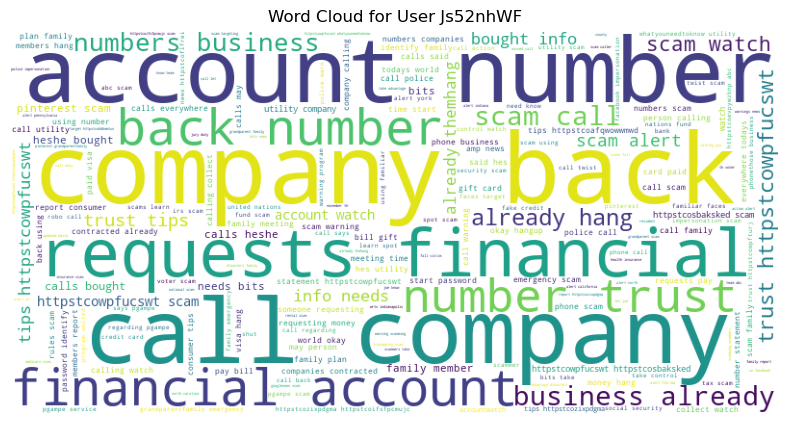

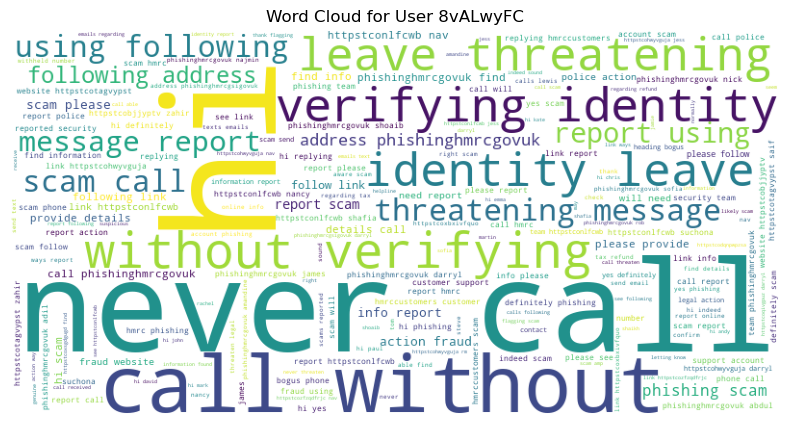

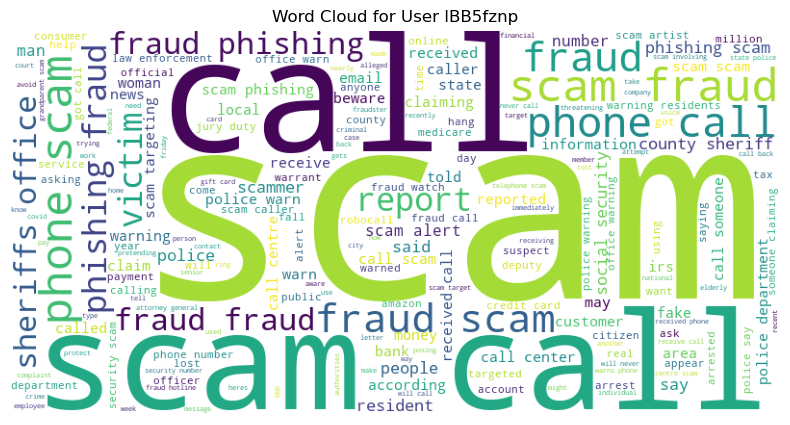

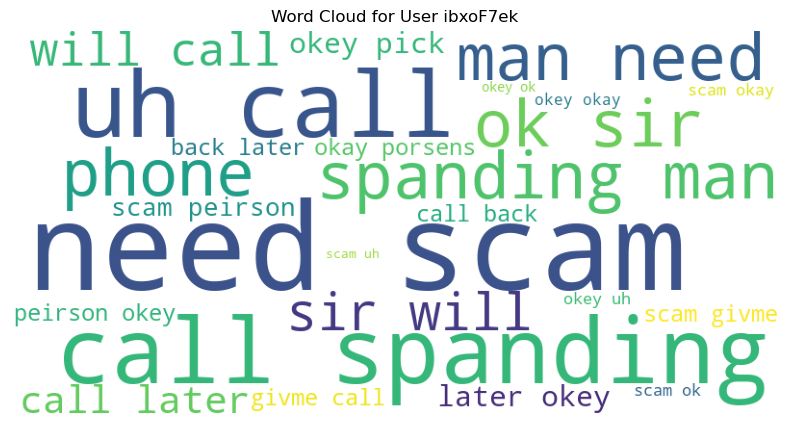

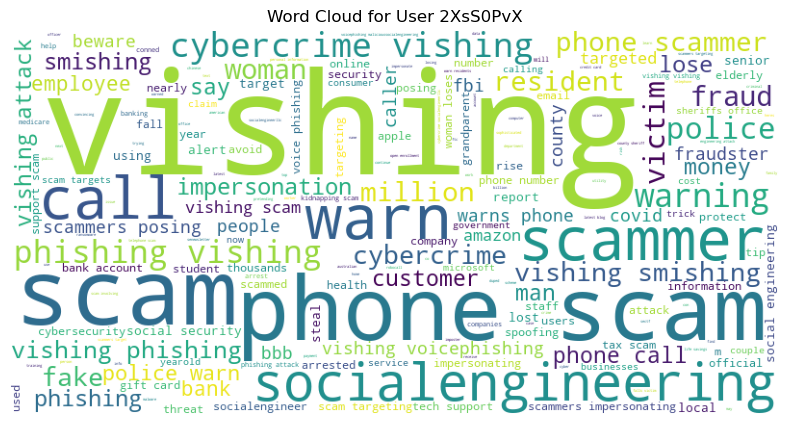

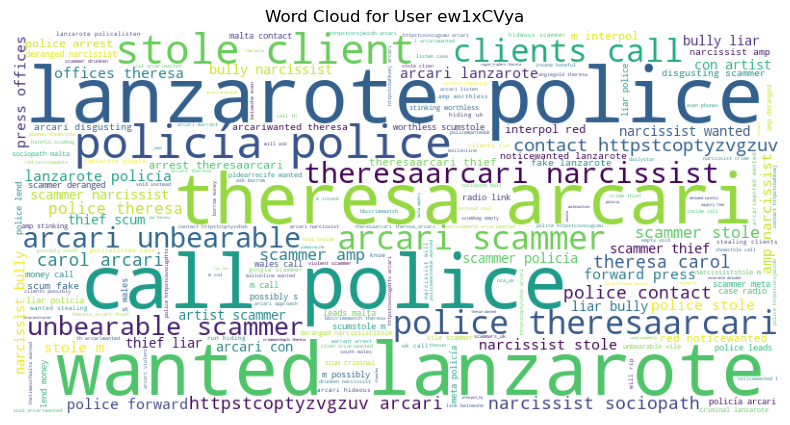

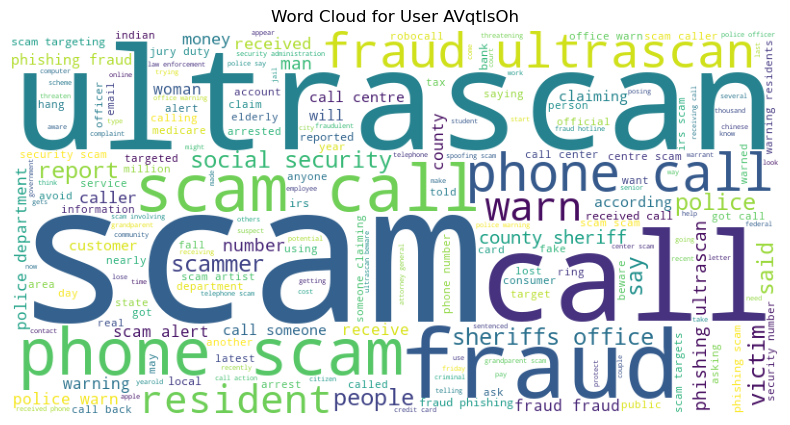

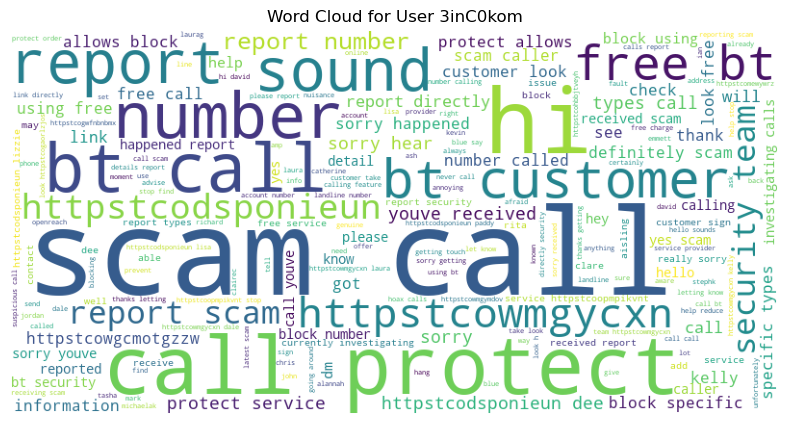

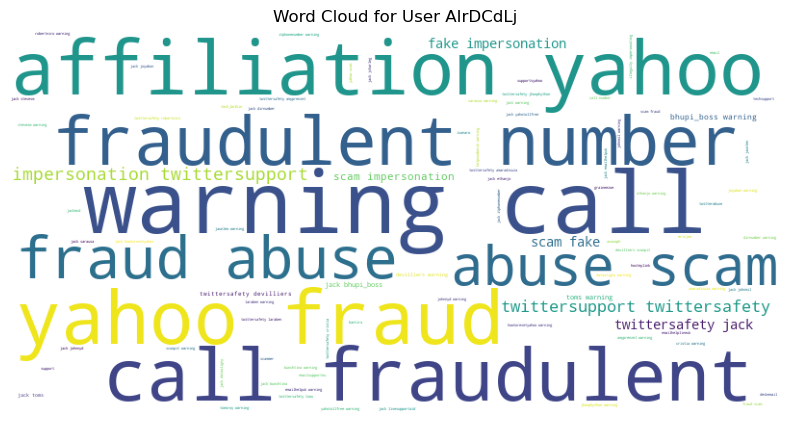

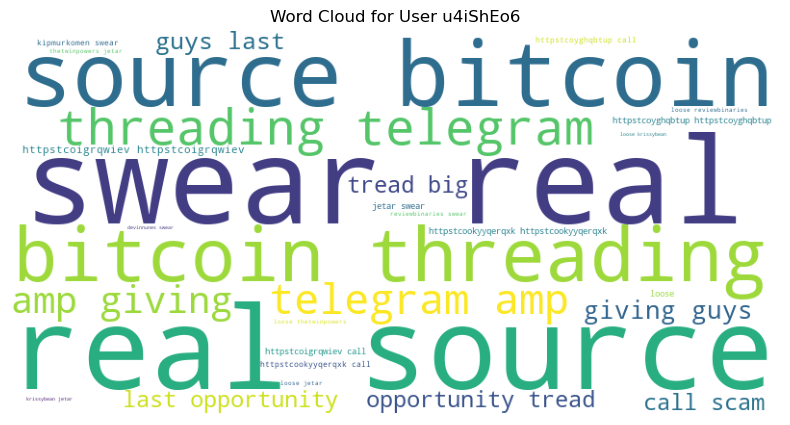

In [229]:
# Generate word clouds for the top ten users
for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top['author_id'] == user]
    # Place current user's words into a single list and join them into a string
    words = " ".join([word for tweet in user_tweets["word_list"] for word in tweet])
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    
    # Display the word clouds
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word Cloud for User {user}")
    plt.show()

In [230]:
# Create list to hold user's sentiment scores
sentiment_scores = []

for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top['author_id'] == user]
    # Place current user's words into a single list and convert them into a string
    #words = str([word for tweet in user_tweets["word_list"] for word in tweet])
    
    for tweet in user_tweets["word_list"]:
        # Join word list into a string
        tweet_str = " ".join(tweet)
        score = TextBlob(tweet_str).sentiment.polarity
        sentiment_scores.append(score)

df_top = df_top.copy()
df_top['sentiment'] = sentiment_scores

In [231]:
df_top

,created_at,author_id,lang,text,word_list,sentiment
12,2019-04-01T09:40:03.000Z,Js52nhWF,en,scam calls he bought your info he needs a few ...,"[scam, calls, bought, info, needs, few, bits, ...",-0.066667
60,2019-04-01T02:50:02.000Z,Js52nhWF,en,scam calls heshe bought your info needs more b...,"[scam, calls, heshe, bought, info, needs, bits...",0.000000
68,2019-04-01T01:18:15.000Z,AVqtlsOh,en,rt ultrascan kingpin in cyber fraud held in no...,"[ultrascan, kingpin, cyber, fraud, held, noida...",0.000000
69,2019-04-01T01:18:02.000Z,lBB5fznp,en,kingpin in cyber fraud held in noida may have ...,"[kingpin, cyber, fraud, held, noida, may, dupe...",0.000000
232,2019-04-01T22:38:19.000Z,AVqtlsOh,en,rt ultrascan police beware of alliant energy p...,"[ultrascan, police, beware, alliant, energy, p...",-0.100000
...,...,...,...,...,...,...
1482977,2019-09-28T09:08:05.000Z,3inC0kom,en,fuddlewuddled hello sounds like a scam call im...,"[fuddlewuddled, hello, sounds, like, scam, cal...",0.030769
1483488,2019-09-29T11:22:19.000Z,AVqtlsOh,en,rt ultrascan tech qampa is that ewarning a sca...,"[ultrascan, tech, qampa, ewarning, scam, here,...",0.030769
1483489,2019-09-29T11:12:33.000Z,lBB5fznp,en,tech qampa is that ewarning a scam here are cl...,"[tech, qampa, ewarning, scam, here, clues, que...",0.030769
1483540,2019-09-29T05:33:24.000Z,ibxoF7ek,en,okay there there are many porsens to whom i ne...,"[okay, porsens, whom, need, scam, givme, call,...",0.030769


In [232]:
# Convert created_at column to datetime
df_top['created_at'] = pd.to_datetime(df_top['created_at'])

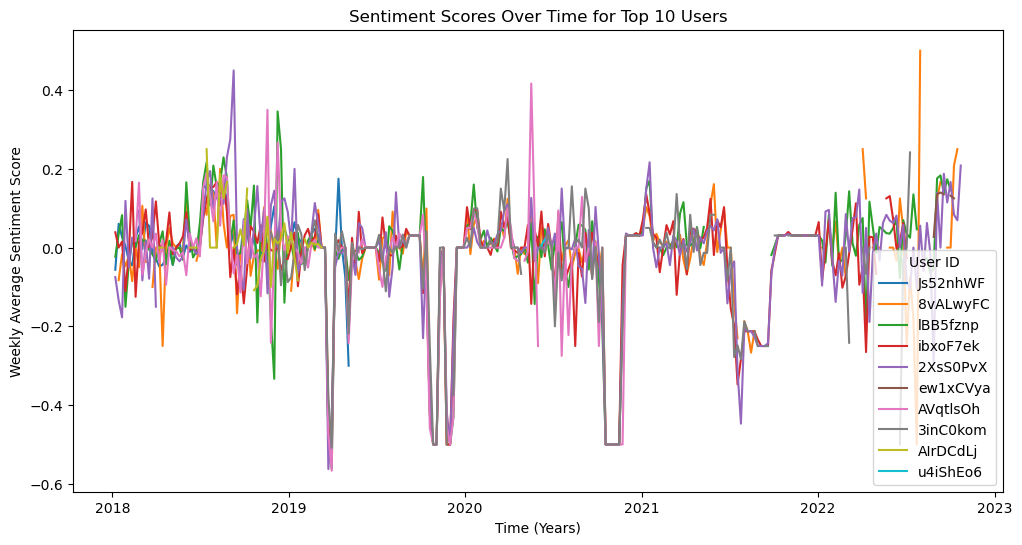

In [233]:
plt.figure(figsize=(12, 6))

for user in top_user_ids:
    # Get tweets only for the current user
    user_tweets = df_top[df_top['author_id'] == user]
    
    # Group tweets by week and compute each week's average sentiment score
    sentiment_over_time = user_tweets.groupby(pd.Grouper(key='created_at', freq='W'))['sentiment'].mean()
    
    # Display sentiment over time
    plt.plot(sentiment_over_time.index, sentiment_over_time, label=user)

plt.xlabel('Time (Years)')
plt.ylabel('Weekly Average Sentiment Score')
plt.title('Sentiment Scores Over Time for Top 10 Users')
plt.legend(title='User ID')
plt.show()

In [234]:
# Create dictionary to store all n-grams for each category
all_ngrams = {}

def ngrams_generator(word_list, n):
    ''' Function: ngrams_generator
        Parameters: list of words, n number of tokens
        Returns: list of strings, lowercased and cleaned, one word per string
    '''
    # Use zip to generate n-grams
    ngrams = zip(*[word_list[i:] for i in range(n)])
    # Concatentate into n-grams 
    return [" ".join(ngram) for ngram in ngrams]

for n in range(1, 5):
    # Create list to store n-grams for current category
    ngrams_list = []
    # Create n-grams for each tweet and extend it into list
    for tweet in df_top['word_list']:
        ngrams_list.extend(ngrams_generator(tweet, n))
    all_ngrams[n] = ngrams_list

# Create dictionary to store top five n-grams for each category
top_ngrams = {}

for n in range(1, 5):
    # Convert list to a series to count frequencies
    ngram_series = pd.Series(all_ngrams[n])
    top_ngrams[n] = ngram_series.value_counts().head(5)
    print(f"Top {n}-grams:")
    print(top_ngrams[n], "\n")

Top 1-grams:
scam      16698
call      13614
fraud      4323
police     3923
number     3493
Name: count, dtype: int64 

Top 2-grams:
scam call       2080
up call         1806
scam calls      1691
company back    1678
out requests    1677
Name: count, dtype: int64 

Top 3-grams:
watch out requests            1597
call company back             1589
out requests financial        1588
requests financial account    1587
financial account numbers     1586
Name: count, dtype: int64 

Top 4-grams:
out requests financial account        1587
requests financial account numbers    1586
up call company back                  1584
company back number trust             1525
watch out requests financial          1508
Name: count, dtype: int64 



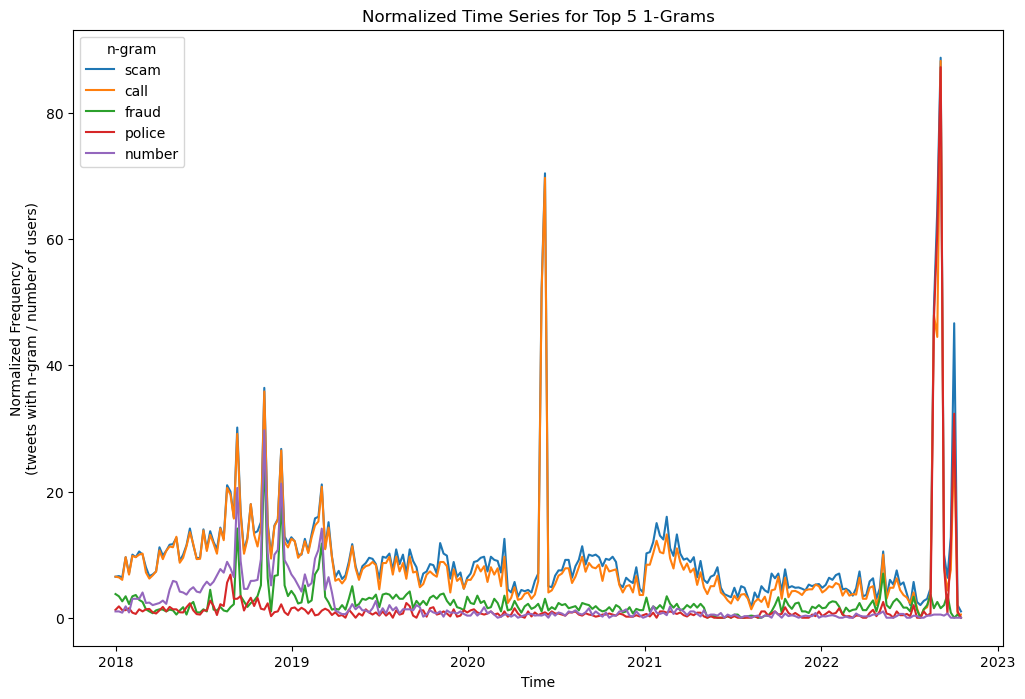

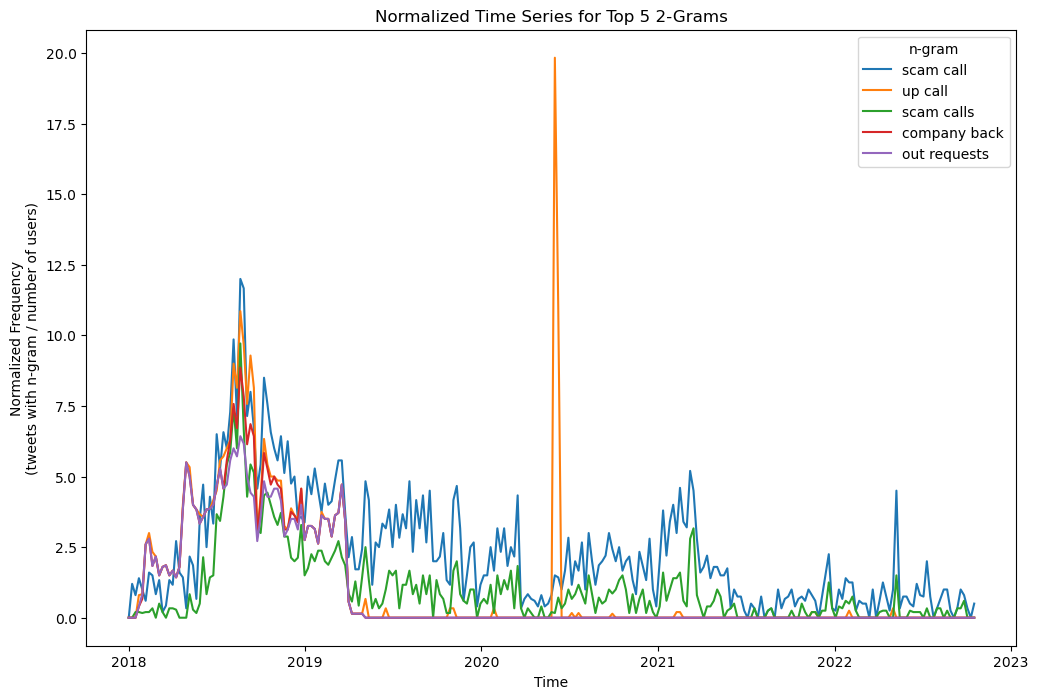

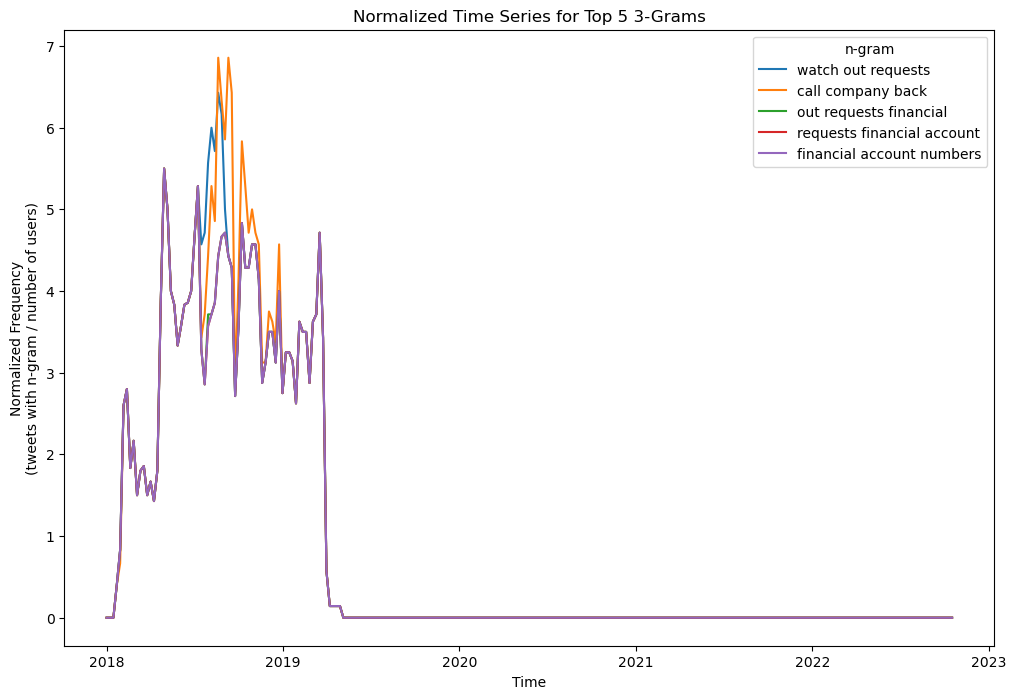

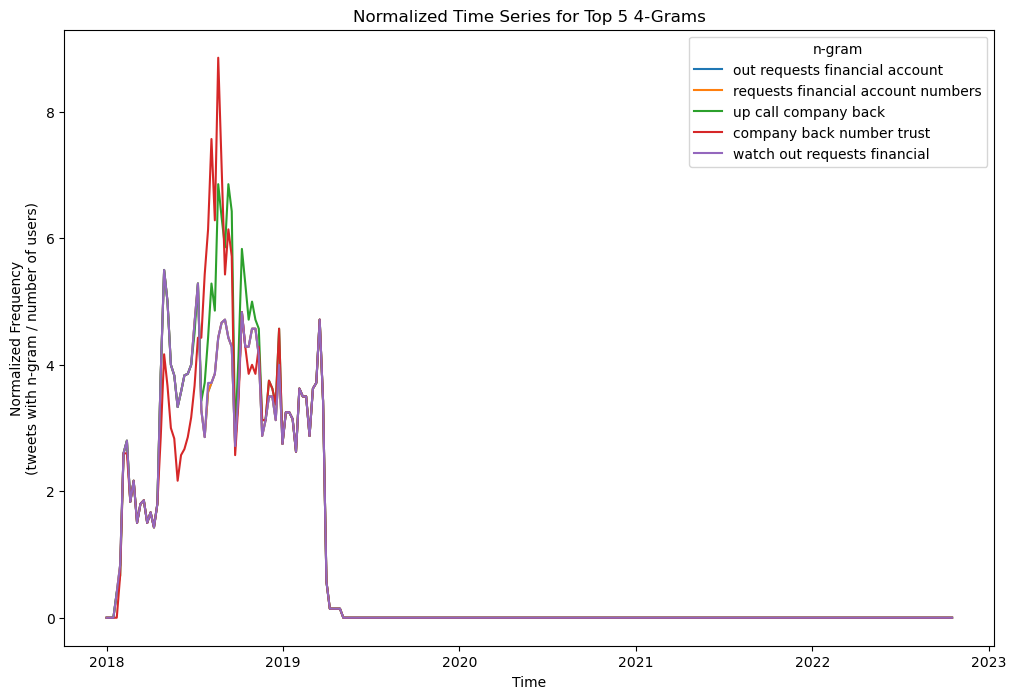

In [235]:
# Create a week column
df_top['week'] = df_top['created_at'].dt.to_period('W')

# Create figures for each category
for n in range(1, 5):
    plt.figure(figsize=(12, 8))
    plt.title(f"Normalized Time Series for Top 5 {n}-Grams")
    
    # Loop over each top n-gram in this category
    for ngram in top_ngrams[n].index:
        # Create dictionary to store the number of tweets per week for current n-gram
        tweet_count = {}
        
        # Zip word list and week together
        for tweet, week in zip(df_top['word_list'], df_top['week']):
            # Join the tweet into a string
            tweet_str = " ".join(tweet)
            if ngram in tweet_str:
                # Check if the week is already in the dictionary
                if week in tweet_count:
                    tweet_count[week] += 1
                else:
                    tweet_count[week] = 1
        
        # Convert dictionary into a series
        tweet_count_series = pd.Series(tweet_count)
        # Convert series into a timestamp so it can be plotted
        tweet_count_series.index = tweet_count_series.index.to_timestamp()
        
        # Count the number of unique users per week
        user_count = df_top.groupby('week')['author_id'].nunique()
        user_count.index = user_count.index.to_timestamp()
        
        # Align indexes for tweet count and user count
        tweet_count_series = tweet_count_series.reindex(user_count.index, fill_value=0)
        
        # Compute normalized frequency by dividing tweets with n-gram by the number unique users in that week
        normalized_frequency = tweet_count_series / user_count
        
        # Plot normalized frequency for current category
        plt.plot(normalized_frequency.index, normalized_frequency, label=ngram)
    
    plt.xlabel("Time")
    plt.ylabel("Normalized Frequency\n(tweets with n-gram / number of users)")
    plt.legend(title="n-gram")
    plt.show()

# Reflection on the Process

This project provided an insightful experience with handling text data, prompting me to build my skills in preprocessing, analyzing, and visualization. I found the context of the assignment, phishing scams on Twitter, to be very interesting as it gave me a perspective on what tasks for programming with data would resemble in a real-world or job setting. 

One of the main challenges that I encountered was handling messy data as the dataset came with various irregularities such as mixed formatting and irrelevant content. To tackle this issue, I split the preprocessing into more manageable steps, making the whole process less overwhelming. Filtering the data was the first step I took so that I would not have to adjust unneeded data. I did this by only keeping rows that were in English and dropping columns that served no purpose in the sections later. To remove specific characters, I applied regular expressions and utilized lambda instead of a for loop. The removal of meaningless words was more time-consuming as I had to look into the dataset and produce a list of stopwords. 

Another challenge that I encountered was during analysis when I needed to identify common words between users. While the initial coding was straightforward as I had used similar code in counting the frequency of words and determining the vocabulary richness, I was not sure if I needed to use the regular expressions or if there was a simpler method. I found that Python had a built-in intersection method, but I was unfamiliar with this method and the code would not run. I then realized that this was because the set that I was using intersection on was packed, meaning that there were multiple arguments in the set. I had to use * in front of my set to indicate that I wanted separate arguments for the intersection method. The result of the code, however, surprised me as it only returned one common word between the users. Unsure if this result was accurate or if I had used the intersection method incorrectly, I manually checked each user’s vocabulary to examine whether there were any additional overlapping words between the users. Fortunately, it seemed like the intersection method had not missed any overlapping words between the users, and I felt satisfaction in correctly applying a method that I had not previously learned.

An additional challenge that I faced was when dealing with generating word clouds. The initial problem was with installing WordCloud. I followed the steps in the week 6 lab, but I still could not find WordCloud after adding conda-forge into Anaconda. I tried an alternative method using !pip install wordcloud which worked. When generating my word clouds, I also faced complications as it would only take a string as an argument. I used str() on my word list, but this caused every word in my word clouds to have a ‘ in front. Thus, I changed my approach and used join() which removed the ‘ around each word. Dealing with this issue proved to be helpful as I would need to use join() during my code in computing sentiment scores. I also experienced a similar issue in installing the TextBlob library when computing the sentiment scores. However, this was not too difficult to fix as I used the same !pip install method.

Conversely, I experienced major difficulties with visualizing n-grams. Creating the n-grams was not complex as I simply used the code provided in the week 6 lab, but plotting the n-grams was much more difficult than I had expected. I had to create a new column for the weeks, zip my word list and week column together, and create a nested if statement. Unable to correctly generate my plots, I realized that some of my variables needed to be converted into a timestamp and aligned with the proper indexes. I still was not sure if I correctly computed the normalized frequencies as they were mostly large numbers greater than one. I expected the normalized frequencies to be a decimal less than one since there should be fewer tweets containing a specific n-gram, being the numerator, than the number of users, being the denominator. 

This project underscored the importance of preprocessing data, having a major impact on the analysis process. These tasks helped build my experience with analyzing and visualizing data, specifically in using tools such as regular expressions and sentiment scoring, which can be translated into the work of a job environment. In terms of potential improvements, I feel that a more sophisticated visualization model could be used to better understand the data. Additionally, plotting the data seemed very complex, and perhaps a more user-friendly model could result in a higher-quality visualization of the data. Despite this, I was able to refine my ability in debugging, splitting up complications step by step and looking into alternative approaches that might be simpler. Overall, this project has been a transformative experience that not only honed my technical skills but also deepened my appreciation for the challenges of real-world data analysis.

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!playwright install